# Final intermediate model: predict n_sick & calls

In [1]:
import sys
print(sys.executable)

/Users/kata/opt/anaconda3/bin/python


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [3]:
# load data
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week
# change type to not get error
df['week'] = df['week'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1152 non-null   datetime64[ns]
 1   n_sick       1152 non-null   int64         
 2   calls        1152 non-null   float64       
 3   n_duty       1152 non-null   int64         
 4   n_sby        1152 non-null   int64         
 5   sby_need     1152 non-null   float64       
 6   dafted       1152 non-null   float64       
 7   year         1152 non-null   int64         
 8   month        1152 non-null   int64         
 9   day_of_week  1152 non-null   int64         
 10  week         1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 108.0 KB


In [4]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.n_sick

#### train test split

In [5]:
# train test split
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]


x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### Predict n_sick with XGBoost

In [6]:
model = XGBRegressor()

In [7]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [8]:
pred = model.predict(x_test)

In [9]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()


In [10]:
# create df to compare data
df_n_sick_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_n_sick_xgb = df_n_sick_xgb.drop(['index'], axis=1)
df_n_sick_xgb['predicted'] = df_n_sick_xgb[0]
df_n_sick_xgb = df_n_sick_xgb.drop([0], axis=1)

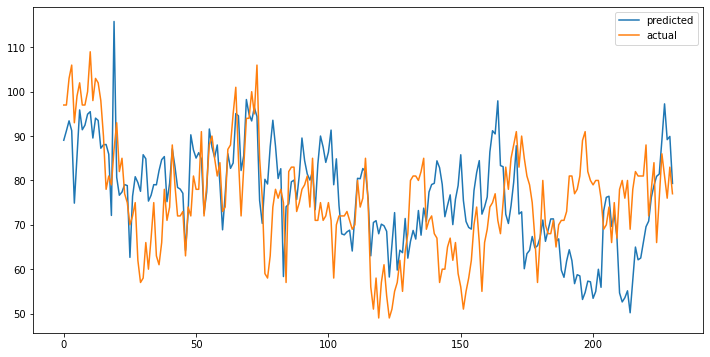

In [11]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_n_sick_xgb['predicted'], label='predicted')
plt.plot(df_n_sick_xgb['n_sick'], label='actual')
plt.legend()
plt.show()


In [12]:
# calculate MSE
mse_xgboost = mean_squared_error(df_n_sick_xgb['n_sick'], df_n_sick_xgb['predicted'])
print('The MSE for predicting n_sick with XGBoost is:', mse_xgboost)

The MSE for predicting n_sick with XGBoost is: 167.96080964734261


### Predict with n_sick with Random Forest

In [13]:
model = RandomForestRegressor()

In [14]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [15]:
pred = model.predict(x_test)

In [16]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [17]:
# create df to compare data
df_n_sick_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_n_sick_rf = df_n_sick_rf.drop(['index'], axis=1)
df_n_sick_rf['predicted'] = df_n_sick_rf[0]
df_n_sick_rf = df_n_sick_rf.drop([0], axis=1)

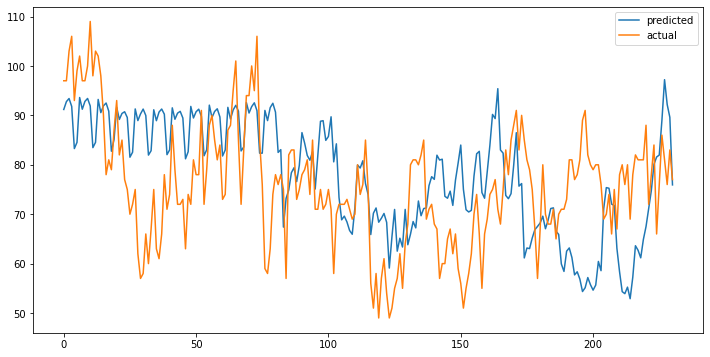

In [18]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_n_sick_rf['predicted'], label='predicted')
plt.plot(df_n_sick_rf['n_sick'], label='actual')
plt.legend()
plt.show()

In [19]:
# calculate MSE
mse_rf = mean_squared_error(df_n_sick_rf['n_sick'], df_n_sick_rf['predicted'])
print('The MSE for predicting n_sick with Random Forest is:', mse_rf)

The MSE for predicting n_sick with Random Forest is: 194.61496277056276


### Predict calls with XGBoost

In [20]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.calls

In [21]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

In [22]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [23]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [24]:
# create df to compare data
df_calls_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_calls_xgb = df_calls_xgb.drop(['index'], axis=1)
df_calls_xgb['predicted'] = df_calls_xgb[0]
df_calls_xgb = df_calls_xgb.drop([0], axis=1)

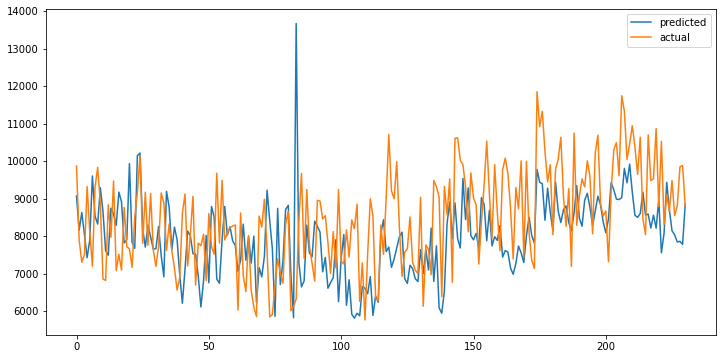

In [25]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_calls_xgb['predicted'], label='predicted')
plt.plot(df_calls_xgb['calls'], label='actual')
plt.legend()
plt.show()

In [26]:
# calculate MSE
mse_xgboost = mean_squared_error(df_calls_xgb['calls'], df_calls_xgb['predicted'])
print('The MSE for predicting calls with XGBoost is:', mse_xgboost)

The MSE for predicting calls with XGBoost is: 2092620.6058171096


### Predict calls with Random Forest

In [27]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [28]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [29]:
# create df to compare data
df_calls_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_calls_rf = df_calls_rf.drop(['index'], axis=1)
df_calls_rf['predicted'] = df_calls_rf[0]
df_calls_rf = df_calls_rf.drop([0], axis=1)

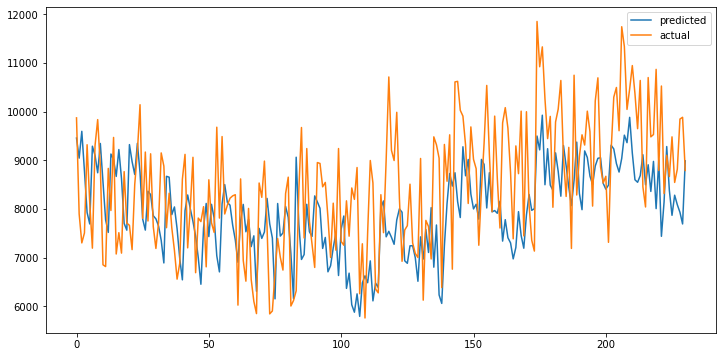

In [30]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_calls_rf['predicted'], label='predicted')
plt.plot(df_calls_rf['calls'], label='actual')
plt.legend()
plt.show()

In [31]:
# calculate MSE
mse_rf = mean_squared_error(df_calls_rf['calls'], df_calls_rf['predicted'])
print('The MSE for predicting calls with Random Forest is:', mse_rf)

The MSE for predicting calls with Random Forest is: 1724417.9038285713


## Predict sby_need with n_sick!

In [32]:
# create new df
# create series with n_sick
n_sick_new = pd.concat([df['n_sick'].iloc[:921], df_n_sick_rf['predicted']], axis=0).reset_index(drop=True)

In [33]:
# add new column into df
df['n_sick_new'] = n_sick_new

In [34]:
# define new X and y data
X = df[['year', 'month', 'day_of_week', 'week', 'n_sick_new']]
y = df.sby_need



In [35]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### XGBoost for sby_need with n_sick

In [36]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [37]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [38]:
# create df to compare data
df_sby_need_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_xgb = df_sby_need_xgb.drop(['index'], axis=1)
df_sby_need_xgb['predicted'] = df_sby_need_xgb[0]
df_sby_need_xgb = df_sby_need_xgb.drop([0], axis=1)


In [39]:
# get rid of values <0:
df_sby_need_xgb['predicted'] = df_sby_need_xgb['predicted'].apply(lambda x: 0 if x < 0 else x)

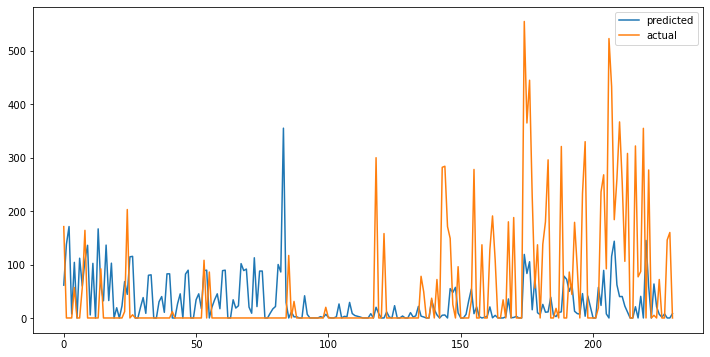

In [40]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_xgb['predicted'], label='predicted')
plt.plot(df_sby_need_xgb['sby_need'], label='actual')
plt.legend()
plt.show()

In [41]:
# calculate MSE
mse_xgb = mean_squared_error(df_sby_need_xgb['sby_need'], df_sby_need_xgb['predicted'])
print('The MSE for predicting sby_need with predicted n_sick with XGBoost is:', mse_xgb)

The MSE for predicting sby_need with predicted n_sick with XGBoost is: 13059.249383692879


In [42]:
Accuracy=r2_score(df_sby_need_xgb['sby_need'], df_sby_need_xgb['predicted'])*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -15.52


### Random Forest for sby_need with n_sick

In [43]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [44]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [45]:
# create df to compare data
df_sby_need_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_rf = df_sby_need_rf.drop(['index'], axis=1)
df_sby_need_rf['predicted'] = df_sby_need_rf[0]
df_sby_need_rf = df_sby_need_rf.drop([0], axis=1)

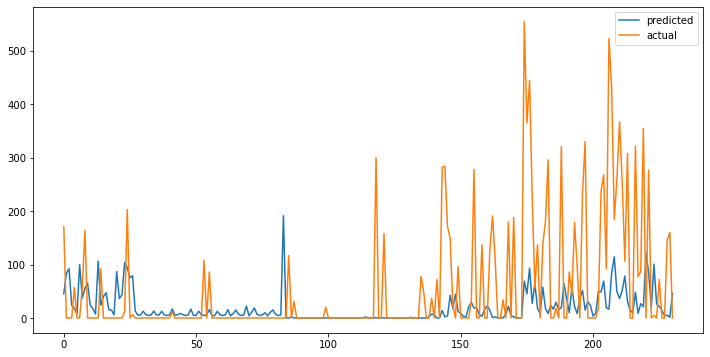

In [46]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_rf['predicted'], label='predicted')
plt.plot(df_sby_need_rf['sby_need'], label='actual')
plt.legend()
plt.show()

In [47]:
# calculate MSE
mse_rf = mean_squared_error(df_sby_need_rf['sby_need'], df_sby_need_rf['predicted'])
print('The MSE for predicting sby_need with predicted n_sick with Random Forest is:', mse_rf)

The MSE for predicting sby_need with predicted n_sick with Random Forest is: 11598.946319047624


## Predict sby_need with calls

### RF with predicted calls:

In [48]:
# create new df
# create series with n_sick
calls_new = pd.concat([df['calls'].iloc[:921], df_calls_rf['predicted']], axis=0).reset_index(drop=True)

In [49]:
# add new column into df
df['calls_new'] = calls_new

In [50]:
# define new X and y data
X = df[['year', 'month', 'day_of_week', 'week', 'calls_new']]
y = df.sby_need

In [51]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

In [52]:
# RF model
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [53]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [54]:
# create df to compare data
df_sby_need_rf_2 = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_rf_2 = df_sby_need_rf_2.drop(['index'], axis=1)
df_sby_need_rf_2['predicted'] = df_sby_need_rf_2[0]
df_sby_need_rf_2 = df_sby_need_rf_2.drop([0], axis=1)

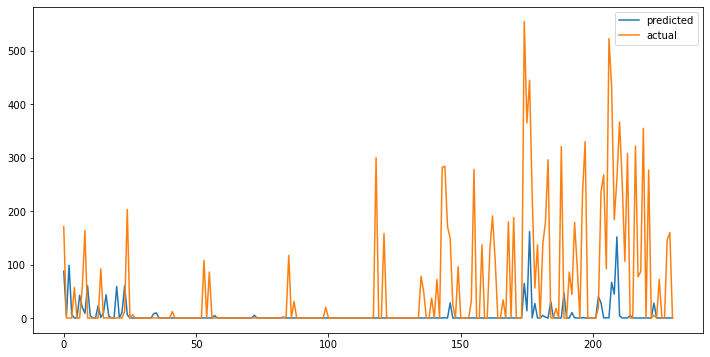

In [55]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_rf_2['predicted'], label='predicted')
plt.plot(df_sby_need_rf_2['sby_need'], label='actual')
plt.legend()
plt.show()

In [56]:
# calculate MSE
mse_rf = mean_squared_error(df_sby_need_rf_2['sby_need'], df_sby_need_rf_2['predicted'])
print('The MSE for predicting sby_need with predicted calls with Random Forest is:', mse_rf)

The MSE for predicting sby_need with predicted calls with Random Forest is: 12659.174775324673


## XGBoost with predicted calls

In [57]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [58]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [59]:
# create df to compare data
df_sby_need_xgb_2 = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_xgb_2 = df_sby_need_xgb_2.drop(['index'], axis=1)
df_sby_need_xgb_2['predicted'] = df_sby_need_xgb_2[0]
df_sby_need_xgb_2 = df_sby_need_xgb_2.drop([0], axis=1)

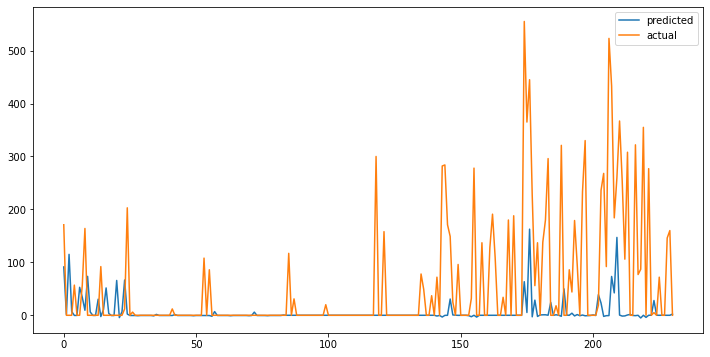

In [60]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_xgb_2['predicted'], label='predicted')
plt.plot(df_sby_need_xgb_2['sby_need'], label='actual')
plt.legend()
plt.show()

In [61]:
# calculate MSE
mse_rf = mean_squared_error(df_sby_need_xgb_2['sby_need'], df_sby_need_xgb_2['predicted'])
print('The MSE for predicting sby_need with predicted calls with XGB is:', mse_rf)

The MSE for predicting sby_need with predicted calls with XGB is: 12785.938683131251


### Linear Regression

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [63]:
# change pred to series for visualizing

pred = pd.Series(pred)
#pred = pred.reset_index()
#y_test = y_test.reset_index()

In [64]:
# create df to compare data
df_lr = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_lr = df_lr.drop(['index'], axis=1)
df_lr['predicted'] = df_lr[0]
df_lr = df_lr.drop(['level_0', 0], axis=1)

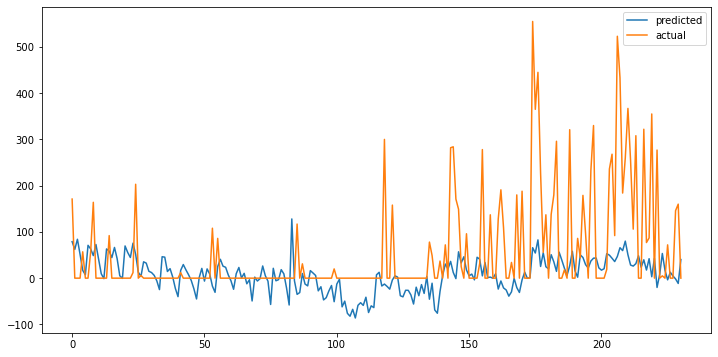

In [65]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_lr['predicted'], label='predicted')
plt.plot(df_lr['sby_need'], label='actual')
plt.legend()
plt.show()

In [66]:
# get rid of values <0:
df_lr['predicted'] = df_lr['predicted'].apply(lambda x: 0 if x < 0 else x)

In [67]:
# calculate MSE
mse_lr = mean_squared_error(df_lr['sby_need'], df_lr['predicted'])
print('The MSE for predicting sby_need with predicted calls with Linear Regression is:', mse_lr)

The MSE for predicting sby_need with predicted calls with Linear Regression is: 11497.186411817458


## Predict sby_need with both

In [68]:

df['calls_new'] = calls_new
df['n_sick_new'] = n_sick_new
df

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,year,month,day_of_week,week,n_sick_new,calls_new
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,2016,4,4,13,73.00,8154.00
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,2016,4,5,13,64.00,8526.00
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,2016,4,6,13,68.00,8088.00
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,2016,4,0,14,71.00,7044.00
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,2016,4,1,14,63.00,7236.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,2019,5,3,21,88.95,8281.56
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,2019,5,4,21,97.22,8086.74
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,2019,5,5,21,92.19,7930.50
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,2019,5,6,21,89.61,7691.10


In [69]:
# define X and y again
X = df[['year', 'month', 'day_of_week', 'week', 'calls_new', 'n_sick_new']]
y = df.sby_need

In [70]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### XGBoost: sby_need with calls and n_sick

In [71]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [72]:
pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [73]:
# create df to compare data
df_all_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_all_xgb = df_all_xgb.drop(['index'], axis=1)
df_all_xgb['predicted'] = df_all_xgb[0]
df_all_xgb = df_all_xgb.drop([0], axis=1)

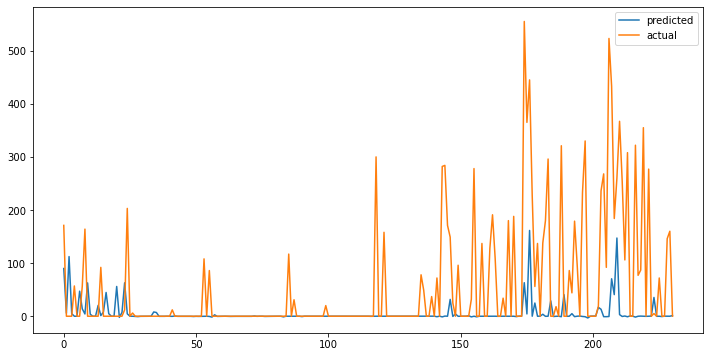

In [74]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_all_xgb['predicted'], label='predicted')
plt.plot(df_all_xgb['sby_need'], label='actual')
plt.legend()
plt.show()

In [75]:
# get rid of values <0:
df_all_xgb['predicted'] = df_all_xgb['predicted'].apply(lambda x: 0 if x < 0 else x)

In [76]:
# calculate MSE
mse_xgb = mean_squared_error(df_all_xgb['sby_need'], df_all_xgb['predicted'])
print('The MSE for predicting sby_need with both with XGB is:', mse_xgb)

The MSE for predicting sby_need with both with XGB is: 12749.232769273403


### RF: sby_need with calls and n_sick

In [77]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [78]:
pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [79]:
# create df to compare data
df_all_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_all_rf = df_all_rf.drop(['index'], axis=1)
df_all_rf['predicted'] = df_all_rf[0]
df_all_rf = df_all_rf.drop([0], axis=1)

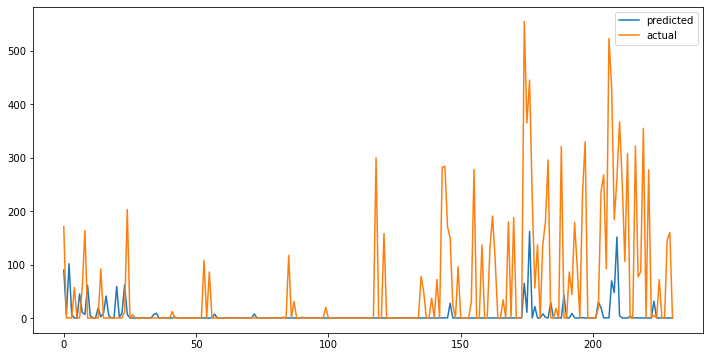

In [80]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_all_rf['predicted'], label='predicted')
plt.plot(df_all_rf['sby_need'], label='actual')
plt.legend()
plt.show()

In [81]:
# calculate MSE
mse_rf = mean_squared_error(df_all_rf['sby_need'], df_all_rf['predicted'])
print('The MSE for predicting sby_need with both with Random Forest is:', mse_rf)

The MSE for predicting sby_need with both with Random Forest is: 12673.029354112554


### LR: sby_need with calls and n_sick

In [82]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [83]:
pred = pd.Series(pred)
#pred = pred.reset_index()
#y_test = y_test.reset_index()
y_test  = y_test.drop(['index', 'level_0'], axis=1)

In [84]:
# create df to compare data
df_all_lr = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
#df_all_lr = df_all_lr.drop(['index'], axis=1)
df_all_lr['predicted'] = df_all_lr[0]
df_all_lr = df_all_lr.drop([0], axis=1)

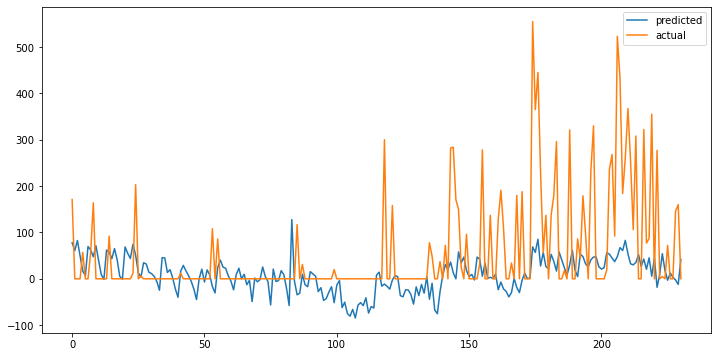

In [85]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_all_lr['predicted'], label='predicted')
plt.plot(df_all_lr['sby_need'], label='actual')
plt.legend()
plt.show()

In [86]:
# get rid of values <0:
df_all_lr['predicted'] = df_all_lr['predicted'].apply(lambda x: 0 if x < 0 else x)

In [87]:
# calculate MSE
mse_lr = mean_squared_error(df_all_lr['sby_need'], df_all_lr['predicted'])
print('The MSE for predicting sby_need with both with Linear Regression is:', mse_lr)

The MSE for predicting sby_need with both with Linear Regression is: 11353.955212954772
